In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [22]:
# === Load Data ===
df = pd.read_csv('D:/Major_project-main/Major_project-main/notebooks/preprocessed_data.csv')

df.head()

,I,P,Q,T,Hydrogen,Oxygen,RH anode,Rh Cathode,V
0,-0.886787,-1.027522,-0.806638,-1.261444,-1.873236,-1.227992,-2.493136,-1.875273,491.114619
1,-0.886787,-1.027522,-0.806638,-1.261444,-1.872990,-1.227992,-2.493136,-1.875273,491.114619
2,-0.886787,-1.027522,-0.806638,-1.261444,-1.872671,-1.227991,-2.493136,-1.875273,491.114619
3,-0.886787,-1.027522,-0.806638,-1.261444,-1.870597,-1.227988,-2.493136,-1.875273,491.114619
4,-0.886787,-1.027522,-0.806638,-1.261444,-1.867493,-1.227981,-2.493136,-1.875273,491.114619


In [23]:
X = df[['I', 'T', 'Hydrogen', 'Oxygen']]  # I = current, T = temperature
y = df['V']  # Voltage

In [24]:
# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# === SVR Pipeline ===
model = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
)

In [26]:
# === Train ===
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=100))])

In [27]:
# === Predictions ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [28]:
# === Evaluation ===
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²:  {r2_score(y_test, y_test_pred):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")

Train R²: 0.9900
Test R²:  0.9863
Train MAE: 2.8753
Test MAE: 3.1732


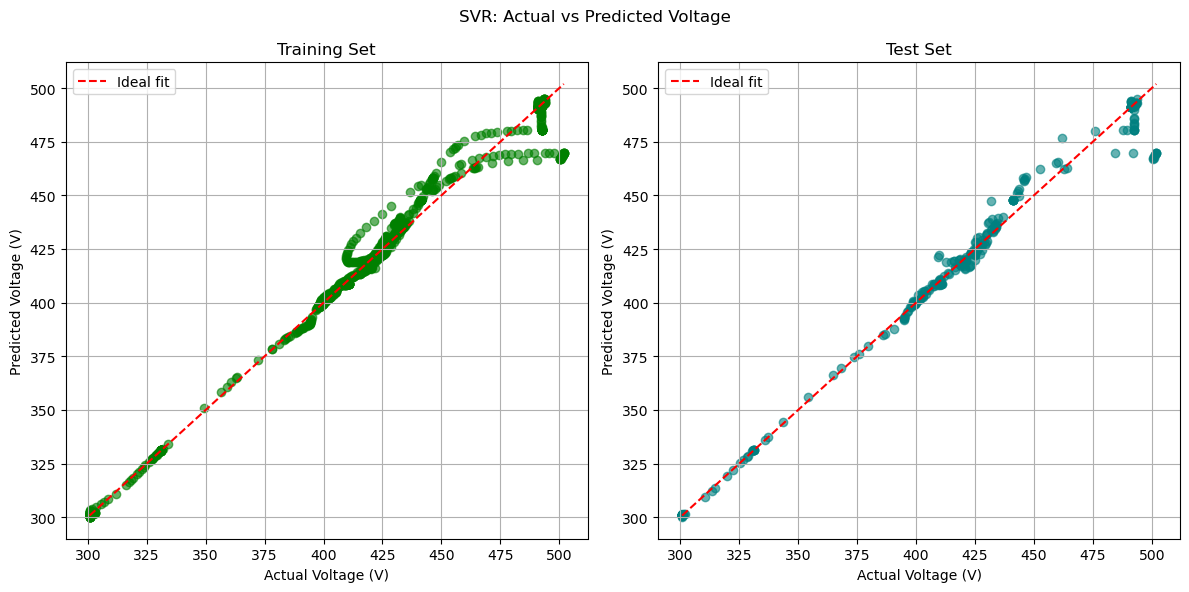

In [29]:
# === Plot: Actual vs Predicted (Train & Test) ===
plt.figure(figsize=(12, 6))

# Train set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.title("Training Set")
plt.xlabel("Actual Voltage (V)")
plt.ylabel("Predicted Voltage (V)")
plt.grid(True)
plt.legend()

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.title("Test Set")
plt.xlabel("Actual Voltage (V)")
plt.ylabel("Predicted Voltage (V)")
plt.grid(True)
plt.legend()

plt.suptitle("SVR: Actual vs Predicted Voltage")
plt.tight_layout()
plt.show()

In [30]:
!pip install xgboost



In [31]:
from xgboost import XGBRegressor



In [32]:
svr_model = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
)
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

# XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# === Blended prediction (simple average) ===
blended_pred = (svr_pred + xgb_pred) / 2

In [33]:
r2 = r2_score(y_test, blended_pred)
mae = mean_absolute_error(y_test, blended_pred)

print(f"Blended Model R² Score: {r2:.4f}")
print(f"Blended Model MAE: {mae:.4f}")

Blended Model R² Score: 0.9965
Blended Model MAE: 1.6642


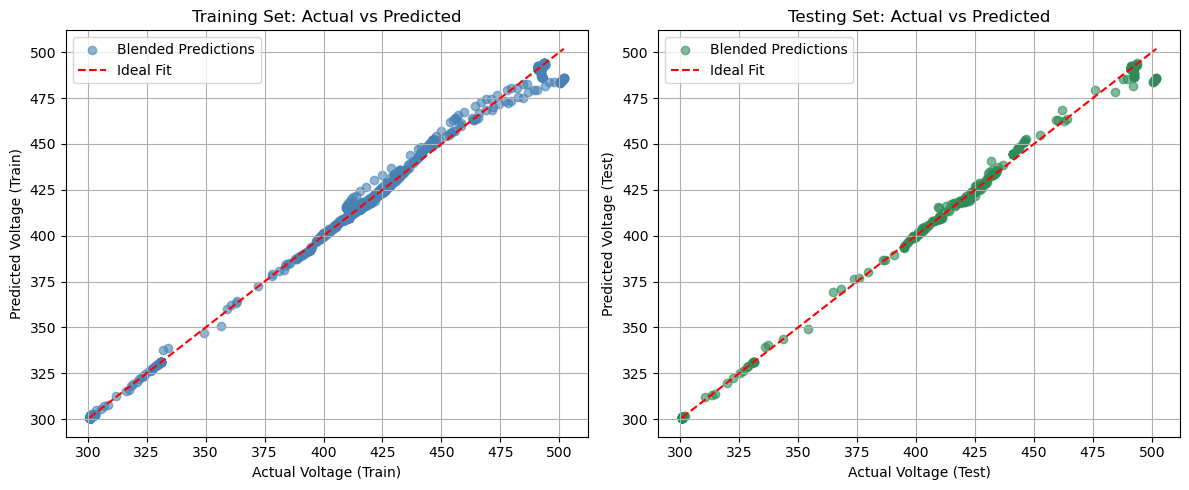

In [ ]:


# Predict on training and testing sets
svr_train_pred = svr_model.predict(X_train)
xgb_train_pred = xgb_model.predict(X_train)
blended_train_pred = (svr_train_pred + xgb_train_pred) / 2

svr_test_pred = svr_model.predict(X_test)
xgb_test_pred = xgb_model.predict(X_test)
blended_test_pred = (svr_test_pred + xgb_test_pred) / 2


# Plotting
plt.figure(figsize=(12, 5))

# === Training Set ===
plt.subplot(1, 2, 1)
plt.scatter(y_train, blended_train_pred, color='steelblue', alpha=0.6, label='Blended Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Voltage (Train)")
plt.ylabel("Predicted Voltage (Train)")
plt.title("Training Set: Actual vs Predicted")
plt.legend()
plt.grid(True)

# === Testing Set ===
plt.subplot(1, 2, 2)
plt.scatter(y_test, blended_test_pred, color='seagreen', alpha=0.6, label='Blended Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Voltage (Test)")
plt.ylabel("Predicted Voltage (Test)")
plt.title("Testing Set: Actual vs Predicted")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [39]:


# Calculate metrics
train_mae = mean_absolute_error(y_train, blended_train_pred)
train_r2 = r2_score(y_train, blended_train_pred)
test_mae = mean_absolute_error(y_test, blended_test_pred)
test_r2 = r2_score(y_test, blended_test_pred)

In [43]:

  
print(f"MAE: {train_mae:.4f}\nR²: {train_r2:.4f}")

MAE: 1.4730
R²: 0.9975


In [44]:

print(f"MAE: {test_mae:.4f}\nR²: {test_r2:.4f}")
   

MAE: 1.6642
R²: 0.9965
